## Multiple Liner Regression for CO2 Emission.

#Importing packages


In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


## Load the data

In [62]:
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"

# Fuel_Consumption.csv

- **MODEL YEAR** e.g. 2014
- **MAKE** e.g. VOLVO
- **MODEL** e.g. S60 AWD
- **VEHICLE CLASS** e.g. COMPACT
- **ENGINE SIZE** e.g. 3.0
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. AS6
- **FUEL TYPE** e.g. Z
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 13.2
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 9.5
- **FUEL CONSUMPTION COMBINED (L/100 km)** e.g. 11.5
- **FUEL CONSUMPTION COMBINED MPG (MPG)** e.g. 25
- **CO2 EMISSIONS (g/km)** e.g. 182 


In [63]:
df = pd.read_csv(url)

df.sample(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
853,2014,NISSAN,PATHFINDER HYBRID 4WD,SUV - STANDARD,2.5,4,AV,X,9.1,8.5,8.8,32,202
427,2014,FORD,TAURUS FFV AWD,FULL-SIZE,3.5,6,AS6,E,18.4,12.5,15.7,18,251
211,2014,CHEVROLET,EXPRESS 1500 CARGO,VAN - CARGO,5.3,8,A4,X,18.0,13.4,15.9,18,366
566,2014,JAGUAR,XKR COUPE,MINICOMPACT,5.0,8,AS6,Z,15.6,10.9,13.5,21,310
696,2014,MAZDA,CX-5,SUV - SMALL,2.5,4,AS6,X,9.6,7.4,8.6,33,198


In [64]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


# Dropping useless columns

In [65]:
df = df.drop(["MODELYEAR","MAKE","MODEL","VEHICLECLASS","FUELTYPE","TRANSMISSION"], axis=1)

# Finding correlation amoung the features.

In [66]:
df.sample(5)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
198,1.4,4,9.1,6.3,7.8,36,179
398,3.5,6,13.7,10.2,12.1,23,278
416,3.7,6,12.1,7.8,10.2,28,235
956,2.5,4,11.3,8.2,9.9,29,228
73,6.0,12,20.0,12.2,16.5,17,380


In [67]:
df.corr()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


#'ENGINESIZE' and 'CYLINDERS' are highly correlated, but 'ENGINESIZE' is more correlated with the target, so we can drop 'CYLINDERS'.

Similarly, each of the four fuel economy variables is highly correlated with each other. Since FUELCONSUMPTION_COMB_MPG is the most correlated with the target, we can drop the others: 'FUELCONSUMPTION_CITY,' 'FUELCONSUMPTION_HWY,' 'FUELCONSUMPTION_COMB.'

In [68]:
df = df.drop(["CYLINDERS","FUELCONSUMPTION_CITY","FUELCONSUMPTION_HWY","FUELCONSUMPTION_COMB",], axis=1)

In [69]:
df.head(9)

,ENGINESIZE,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,33,196
1,2.4,29,221
2,1.5,48,136
3,3.5,25,255
4,3.5,27,244
5,3.5,28,230
6,3.5,28,232
7,3.7,25,255
8,3.7,24,267


# Plotting the graph using Pandas.

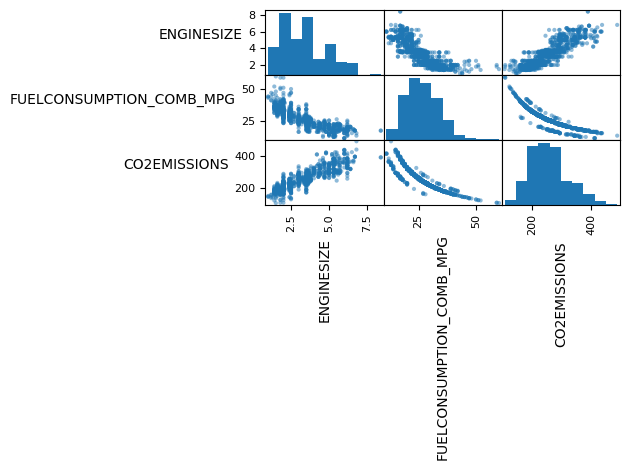

In [70]:
axes = pd.plotting.scatter_matrix(df)

#Rotate Axis lable
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90) #Rotate x axis 90 degrees
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha("right") #set lables to right side to remove overlapping

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0) #Remove white spaces
plt.show()

Extract the first 2 columns "ENGINESIZE" & "FUELCONSUMPTION_COMB_MPG" then convert them into numpy arrays.
Also the co2 emission as 2 numpy array.

In [71]:
X = df.iloc[:,[0,1]].to_numpy()
y = df.iloc[:,[2]].to_numpy()

## Standarize the input features.
 A standardized variable has zero mean and a standard deviation of one.

In [72]:
from sklearn import preprocessing

std_scalar = preprocessing.StandardScaler()
X_std = std_scalar.fit_transform(X)

In [73]:
pd.DataFrame(X_std).describe().round(2)

,0,1
count,1067.00,1067.00
mean,0.00,-0.00
std,1.00,1.00
min,-1.66,-2.07
25%,-0.95,-0.73
50%,0.04,-0.06
75%,0.67,0.61
max,3.57,4.50


A standardized variable has zero mean and a standard deviation of one.

## Creating Training and Test data.
Training dataset = 80% and Testing dataset = 20%

In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size = 0.2, random_state = 42)

## Building a Multiple Linaer Regression Model

In [75]:
from sklearn import linear_model

#Model object
regressor = linear_model.LinearRegression()

#Trainig the model on training data
regressor.fit(X_train, y_train)

#Printing the coefficients
coef_ = regressor.coef_
intercept_ = regressor.intercept_

print("Coefficients:", coef_)
print("Intercept: ", intercept_)
print("This value are for standarized data not the original data.")

Coefficients: [[ 25.27339614 -37.4381472 ]]
Intercept:  [256.29072488]
This value are for standarized data not the original data.


## Reverse Standarize

Formulas:
                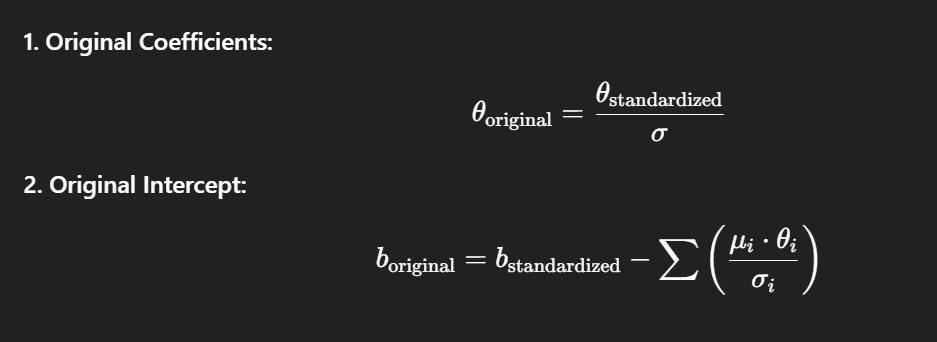

In [76]:
means_ = std_scalar.mean_                   # μ_i: mean of each original feature
std_devs_ = np.sqrt(std_scalar.var_)         # σ_i: standard deviation of each feature


# Formula to convert coefficients from standardized to original scale:
# coef_original[i] = coef_[i] / σ_i
# This rescales each standardized coefficient to the original feature's unit
coef_original = coef_ / std_devs_


# Formula to convert the intercept:
# intercept_original = intercept_ - sum( (μ_i * coef_[i]) / σ_i )
# This adjusts the intercept to match the shifted (non-zero-mean) input space
intercept_original = intercept_ - np.sum((means_ * coef_) / std_devs_ )


print("Original Coefficients: ", coef_original)
print("Original Intercept: ", intercept_original)

Original Coefficients:  [[17.8581369  -5.01502179]]
Original Intercept:  [329.1363967]


### Visualize model outputs


In [ ]:
# Ensure X1, X2, and y_test have compatible shapes for 3D plotting
X1 = X_test[:, 0] if X_test.ndim > 1 else X_test
X2 = X_test[:, 1] if X_test.ndim > 1 else np.zeros_like(X1)

# Create a mesh grid for plotting the regression plane
X1_surf, X2_surf = np.meshgrid(np.linspace(X1.min(), X2.max(), 100),
                               np.linspace(X1,min(), X2.max(), 100))

y_surf = intercept_ + coef_[0,0] * X1_surf + coef_[0,1] * X2_surf 



2